In [1]:
# Install prophet library
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#import requirements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prophet import Prophet
#Create bins for game splits
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [3]:
#Read in CSV data files
braun_df = pd.read_csv('./resources/nuggets stats/braun.csv')
pope_df = pd.read_csv('./resources/nuggets stats/caldwell-pope.csv')
gordon_df = pd.read_csv('./resources/nuggets stats/gordon.csv')
holiday_df = pd.read_csv('./resources/nuggets stats/holiday.csv')
jokic_df = pd.read_csv('./resources/nuggets stats/jokic.csv')
murray_df = pd.read_csv('./resources/nuggets stats/murray.csv')
porterjr_df = pd.read_csv('./resources/nuggets stats/porterjr.csv')
watson_df = pd.read_csv('./resources/nuggets stats/watson.csv')
conley_df = pd.read_csv('./resources/timberwolves stats/conley.csv')
edwards_df = pd.read_csv('./resources/timberwolves stats/edwards.csv')
gobert_df = pd.read_csv('./resources/timberwolves stats/gobert.csv')
kat_df = pd.read_csv('./resources/timberwolves stats/KAT.csv')
mcdaniels_df = pd.read_csv('./resources/timberwolves stats/mcdaniels.csv')
morris_df = pd.read_csv('./resources/timberwolves stats/morris.csv')
reid_df = pd.read_csv('./resources/timberwolves stats/reid.csv')
walker_df = pd.read_csv('./resources/timberwolves stats/walker.csv')
wolves_schedule = pd.read_csv('./resources/schedules/wolves schedule.csv',parse_dates=True)
nuggets_schedule = pd.read_csv('./resources/schedules/nuggets schedule.csv',parse_dates=True)

In [4]:

wolves_schedule = wolves_schedule[['date']].copy()
wolves_schedule['date'] = pd.to_datetime(wolves_schedule['date']).dt.tz_localize(None)
wolves_schedule.info()
nuggets_schedule = wolves_schedule[['date']].copy()
nuggets_schedule['date'] = pd.to_datetime(wolves_schedule['date']).dt.tz_localize(None)
nuggets_schedule.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    97 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 908.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    97 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 908.0 bytes


In [5]:
#combine game dates to player stats dataframe for nuggets
braun_df = pd.concat([nuggets_schedule, braun_df], axis=1) 
pope_df = pd.concat([nuggets_schedule, pope_df], axis=1)
gordon_df = pd.concat([nuggets_schedule, gordon_df], axis=1)
holiday_df = pd.concat([nuggets_schedule, holiday_df], axis=1)
jokic_df = pd.concat([nuggets_schedule, jokic_df], axis=1)
murray_df = pd.concat([nuggets_schedule, murray_df], axis=1)
porterjr_df = pd.concat([nuggets_schedule, porterjr_df], axis=1)
watson_df = pd.concat([nuggets_schedule, watson_df], axis=1)

#combine game dates to player stats dataframe for timberwolves
conley_df = pd.concat([wolves_schedule, conley_df], axis=1)
edwards_df = pd.concat([wolves_schedule, edwards_df], axis=1)
gobert_df = pd.concat([wolves_schedule, gobert_df], axis=1)
kat_df = pd.concat([wolves_schedule, kat_df], axis=1)
mcdaniels_df = pd.concat([wolves_schedule, mcdaniels_df], axis=1)
morris_df = pd.concat([wolves_schedule, morris_df], axis=1)
reid_df = pd.concat([wolves_schedule, reid_df], axis=1)
walker_df = pd.concat([wolves_schedule, walker_df], axis=1)

kat_df

,date,points,pos,min,fgm,fga,fgp,ftm,fta,ftp,...,comment,player.id,player.firstname,player.lastname,team.id,team.name,team.nickname,team.code,team.logo,game.id
0,2023-10-07 16:00:00,14.0,C,18.0,4.0,9.0,44.4,5.0,5.0,100.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12478.0
1,2023-10-14 23:30:00,17.0,C,27.0,6.0,14.0,42.9,1.0,2.0,50.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12511.0
2,2023-10-18 00:00:00,19.0,C,36.0,8.0,25.0,32.0,1.0,1.0,100.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12557.0
3,2023-10-20 00:00:00,12.0,C,31.0,5.0,12.0,41.7,1.0,2.0,50.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12581.0
4,2023-10-25 23:30:00,16.0,C,36.0,7.0,17.0,41.2,1.0,1.0,100.0,...,NaN,519.0,Karl-Anthony,Towns,22.0,Minnesota Timberwolves,Timberwolves,MIN,https://upload.wikimedia.org/wikipedia/fr/thum...,12592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2024-05-11 01:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2024-05-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2024-05-15 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,2024-05-17 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


17:51:33 - cmdstanpy - INFO - Chain [1] start processing
17:51:33 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Braun,4.862005,0.798192
1,Braun,-2.513871,0.905465
2,Braun,3.858467,0.949780
3,Braun,-5.531465,0.979120
4,Braun,-2.040998,1.066833
...,...,...,...
92,NaN,NaN,NaN
93,NaN,NaN,NaN
94,NaN,NaN,NaN
95,NaN,NaN,NaN


17:51:33 - cmdstanpy - INFO - Chain [1] start processing
17:51:33 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Caldwell-Pope,-0.943538,3.799278
1,Caldwell-Pope,3.344552,3.701147
2,Caldwell-Pope,7.151538,3.660609
3,Caldwell-Pope,7.441701,3.633770
4,Caldwell-Pope,11.049680,3.553532
...,...,...,...
92,NaN,NaN,NaN
93,NaN,NaN,NaN
94,NaN,NaN,NaN
95,NaN,NaN,NaN


17:51:33 - cmdstanpy - INFO - Chain [1] start processing
17:51:33 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Gordon,5.670671,8.451520
1,Gordon,3.923981,8.407567
2,Gordon,4.591574,8.389410
3,Gordon,11.071752,8.377389
4,Gordon,7.556521,8.341450
...,...,...,...
92,NaN,NaN,NaN
93,NaN,NaN,NaN
94,NaN,NaN,NaN
95,NaN,NaN,NaN


17:51:33 - cmdstanpy - INFO - Chain [1] start processing
17:51:34 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Holiday,5.151044,-6.926634
1,Holiday,4.496299,-6.920185
2,Holiday,-4.393054,-6.917521
3,Holiday,-3.880028,-6.915757
4,Holiday,1.871458,-6.910484
...,...,...,...
92,NaN,NaN,NaN
93,NaN,NaN,NaN
94,NaN,NaN,NaN
95,NaN,NaN,NaN


17:51:34 - cmdstanpy - INFO - Chain [1] start processing
17:51:34 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Jokic,0.958446,8.144033
1,Jokic,6.296688,8.119361
2,Jokic,9.528707,8.109168
3,Jokic,12.998241,8.102420
4,Jokic,8.789032,8.082247
...,...,...,...
92,NaN,7.692754,7.444279
93,NaN,NaN,NaN
94,NaN,NaN,NaN
95,NaN,NaN,NaN


17:51:34 - cmdstanpy - INFO - Chain [1] start processing
17:51:34 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Murray,11.951527,19.803433
1,Murray,3.822624,19.685936
2,Murray,7.132508,19.637397
3,Murray,3.266580,19.605261
4,Murray,11.875075,19.509187
...,...,...,...
92,NaN,NaN,NaN
93,NaN,NaN,NaN
94,NaN,NaN,NaN
95,NaN,NaN,NaN


17:51:35 - cmdstanpy - INFO - Chain [1] start processing
17:51:35 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Porter Jr.,11.876123,-0.117915
1,Porter Jr.,10.105197,-0.124777
2,Porter Jr.,6.678498,-0.127612
3,Porter Jr.,7.214758,-0.129488
4,Porter Jr.,1.592157,-0.135099
...,...,...,...
92,NaN,NaN,NaN
93,NaN,NaN,NaN
94,NaN,NaN,NaN
95,NaN,NaN,NaN


17:51:35 - cmdstanpy - INFO - Chain [1] start processing
17:51:35 - cmdstanpy - INFO - Chain [1] done processing


,player.lastname,yhat,trend
0,Watson,-4.065107,0.412706
1,Watson,-1.341967,0.485326
2,Watson,0.263782,0.515326
3,Watson,-1.622980,0.535188
4,Watson,-1.808480,0.594567
...,...,...,...
92,NaN,-0.833275,2.532146
93,NaN,-2.173732,2.542077
94,NaN,-2.799131,2.552008
95,NaN,NaN,NaN


,player.lastname,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,Watson,2023-10-07 16:00:00,0.412706,-16.300097,8.576463,0.412706,0.412706,-4.477813,-4.477813,-4.477813,-6.035842,-6.035842,-6.035842,1.558029,1.558029,1.558029,0.0,0.0,0.0,-4.065107
1,Watson,2023-10-14 23:30:00,0.485326,-13.491261,9.976478,0.485326,0.485326,-1.827294,-1.827294,-1.827294,-3.110464,-3.110464,-3.110464,1.283170,1.283170,1.283170,0.0,0.0,0.0,-1.341967
2,Watson,2023-10-18 00:00:00,0.515326,-11.988246,12.760356,0.515326,0.515326,-0.251544,-0.251544,-0.251544,-1.780072,-1.780072,-1.780072,1.528528,1.528528,1.528528,0.0,0.0,0.0,0.263782
3,Watson,2023-10-20 00:00:00,0.535188,-13.277017,10.043279,0.535188,0.535188,-2.158168,-2.158168,-2.158168,-1.780072,-1.780072,-1.780072,-0.378096,-0.378096,-0.378096,0.0,0.0,0.0,-1.622980
4,Watson,2023-10-25 23:30:00,0.594567,-13.726022,9.901407,0.594567,0.594567,-2.403047,-2.403047,-2.403047,-3.110464,-3.110464,-3.110464,0.707417,0.707417,0.707417,0.0,0.0,0.0,-1.808480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,NaN,2024-05-08 02:00:00,2.532146,-13.081609,10.289364,2.532146,2.532146,-3.365421,-3.365421,-3.365421,-5.108367,-5.108367,-5.108367,1.742946,1.742946,1.742946,0.0,0.0,0.0,-0.833275
93,NaN,2024-05-09 02:00:00,2.542077,-14.211612,10.115508,2.542077,2.542077,-4.715809,-4.715809,-4.715809,-5.108367,-5.108367,-5.108367,0.392559,0.392559,0.392559,0.0,0.0,0.0,-2.173732
94,NaN,2024-05-10 02:00:00,2.552008,-14.274741,9.037469,2.552008,2.552008,-5.351139,-5.351139,-5.351139,-5.108367,-5.108367,-5.108367,-0.242771,-0.242771,-0.242771,0.0,0.0,0.0,-2.799131
95,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


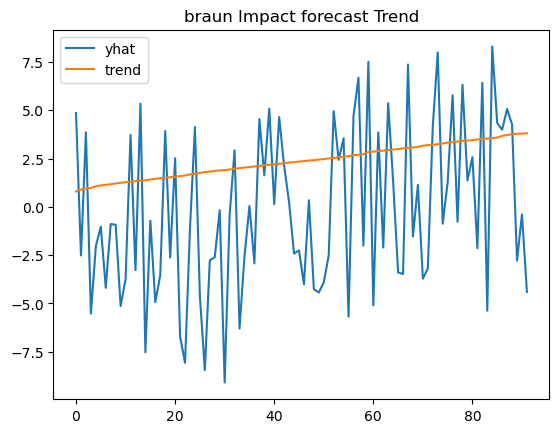

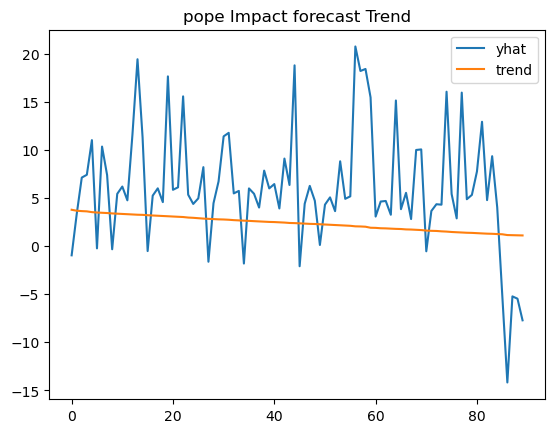

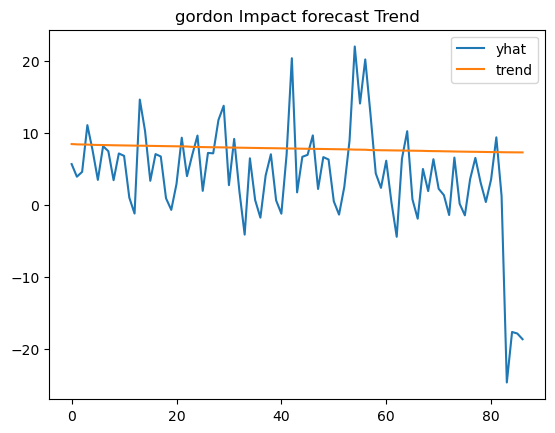

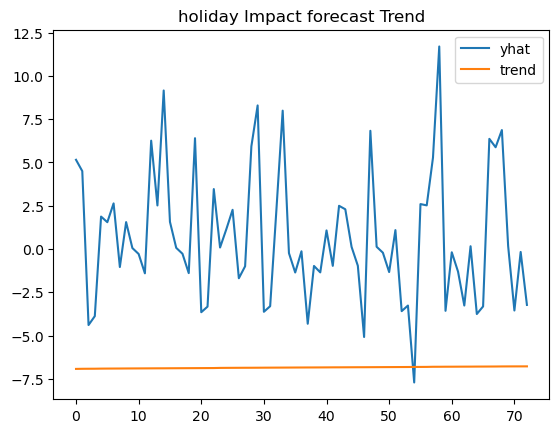

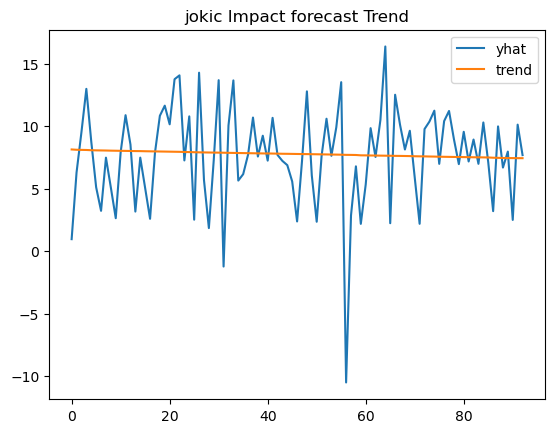

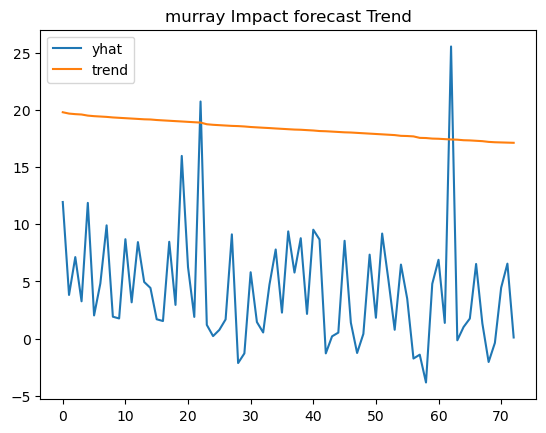

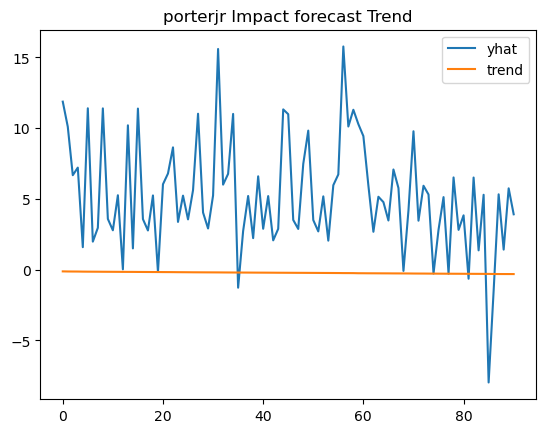

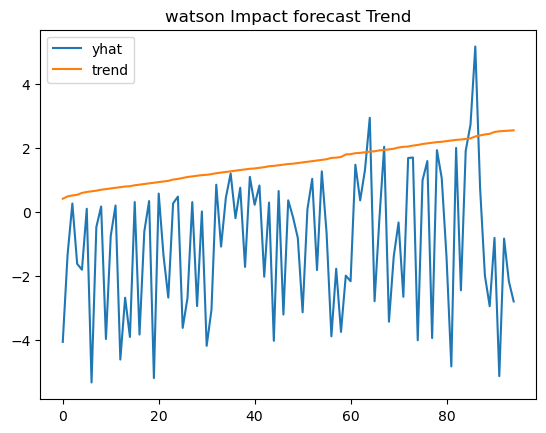

In [6]:
#nuggets player impact(as determined by plus/minus), and date, renamed to prophet syntax
braun_impact = braun_df[['date','plusMinus']]
braun_impact = braun_impact.rename(columns={'date':'ds','plusMinus':'y'})
braun_model = Prophet()
braun_model.fit(braun_impact)
braun_future = braun_model.make_future_dataframe(periods=3, freq='D')
braun_forecast = braun_model.predict(braun_future)
braun_forecast[['yhat','trend']].plot(legend='braun impact trend',title='braun Impact forecast Trend')
braun_trend = pd.concat([braun_df['player.lastname'], braun_forecast],axis=1)
display(braun_trend[['player.lastname','yhat','trend']])

pope_impact = pope_df[['date','plusMinus']]
pope_impact = pope_impact.rename(columns={'date':'ds','plusMinus':'y'})
pope_model = Prophet()
pope_model.fit(pope_impact)
pope_future = pope_model.make_future_dataframe(periods=3, freq='D')
pope_forecast = pope_model.predict(pope_future)
pope_forecast[['yhat','trend']].plot(legend='pope impact trend',title='pope Impact forecast Trend')
pope_trend = pd.concat([pope_df['player.lastname'], pope_forecast],axis=1)
display(pope_trend[['player.lastname','yhat','trend']])

gordon_impact = gordon_df[['date','plusMinus']]
gordon_impact = gordon_impact.rename(columns={'date':'ds','plusMinus':'y'})
gordon_model = Prophet()
gordon_model.fit(gordon_impact)
gordon_future = gordon_model.make_future_dataframe(periods=3, freq='D')
gordon_forecast = gordon_model.predict(gordon_future)
gordon_forecast[['yhat','trend']].plot(legend='gordon impact trend',title='gordon Impact forecast Trend')
gordon_trend = pd.concat([gordon_df['player.lastname'], gordon_forecast],axis=1)
display(gordon_trend[['player.lastname','yhat','trend']])

holiday_impact = holiday_df[['date','plusMinus']]
holiday_impact = holiday_impact.rename(columns={'date':'ds','plusMinus':'y'})
holiday_model = Prophet()
holiday_model.fit(holiday_impact)
holiday_future = holiday_model.make_future_dataframe(periods=3, freq='D')
holiday_forecast = holiday_model.predict(holiday_future)
holiday_forecast[['yhat','trend']].plot(legend='holiday impact trend',title='holiday Impact forecast Trend')
holiday_trend = pd.concat([holiday_df['player.lastname'], holiday_forecast],axis=1)
display(holiday_trend[['player.lastname','yhat','trend']])

jokic_impact = jokic_df[['date','plusMinus']]
jokic_impact = jokic_impact.rename(columns={'date':'ds','plusMinus':'y'})
jokic_model = Prophet()
jokic_model.fit(jokic_impact)
jokic_future = jokic_model.make_future_dataframe(periods=3, freq='D')
jokic_forecast = jokic_model.predict(jokic_future)
jokic_forecast[['yhat','trend']].plot(legend='jokic impact trend',title='jokic Impact forecast Trend')
jokic_trend = pd.concat([jokic_df['player.lastname'], jokic_forecast],axis=1)
display(jokic_trend[['player.lastname','yhat','trend']])

murray_impact = murray_df[['date','plusMinus']]
murray_impact = murray_impact.rename(columns={'date':'ds','plusMinus':'y'})
murray_model = Prophet()
murray_model.fit(murray_impact)
murray_future = murray_model.make_future_dataframe(periods=3, freq='D')
murray_forecast = murray_model.predict(murray_future)
murray_forecast[['yhat','trend']].plot(legend='murray impact trend',title='murray Impact forecast Trend')
murray_trend = pd.concat([murray_df['player.lastname'], murray_forecast],axis=1)
display(murray_trend[['player.lastname','yhat','trend']])

porterjr_impact = porterjr_df[['date','plusMinus']]
porterjr_impact = porterjr_impact.rename(columns={'date':'ds','plusMinus':'y'})
porterjr_model = Prophet()
porterjr_model.fit(porterjr_impact)
porterjr_future = porterjr_model.make_future_dataframe(periods=3, freq='D')
porterjr_forecast = porterjr_model.predict(porterjr_future)
porterjr_forecast[['yhat','trend']].plot(legend='porterjr impact trend',title='porterjr Impact forecast Trend')
porterjr_trend = pd.concat([porterjr_df['player.lastname'], porterjr_forecast],axis=1)
display(porterjr_trend[['player.lastname','yhat','trend']])

watson_impact = watson_df[['date','plusMinus']]
watson_impact = watson_impact.rename(columns={'date':'ds','plusMinus':'y'})
watson_model = Prophet()
watson_model.fit(watson_impact)
watson_future = watson_model.make_future_dataframe(periods=3, freq='D')
watson_forecast = watson_model.predict(watson_future)
watson_forecast[['yhat','trend']].plot(legend='watson impact trend',title='watson Impact forecast Trend')
watson_trend = pd.concat([watson_df['player.lastname'], watson_forecast],axis=1)
display(watson_trend[['player.lastname','yhat','trend']])
display(watson_trend)

In [10]:
braun_trend = braun_trend[['trend','yhat','daily']].mean()
pope_trend = pope_trend[['trend','yhat','daily']].mean()
holiday_trend = holiday_trend[['trend','yhat','daily']].mean()
jokic_trend = jokic_trend[['trend','yhat','daily']].mean()
murray_trend = murray_trend[['trend','yhat','daily']].mean()
porterjr_trend = porterjr_trend[['trend','yhat','daily']].mean()
watson_trend = watson_trend[['trend','yhat','daily']].mean()
#_trend[['trend','yhat']].mean()
display(braun_trend.info())
display(pope_trend)
display(holiday_trend)
display(jokic_trend)
display(murray_trend)
display(porterjr_trend)

display(watson_trend)


<class 'pandas.core.series.Series'>
Index: 3 entries, trend to daily
Series name: None
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 48.0+ bytes


None

trend    2.387490
yhat     6.112108
daily    3.897249
dtype: float64

trend   -6.847451
yhat     0.644670
daily    7.461455
dtype: float64

trend    7.777637
yhat     7.640456
daily   -0.039539
dtype: float64

trend    18.360742
yhat      4.354597
daily   -13.821101
dtype: float64

trend   -0.217701
yhat     5.214852
daily    5.365680
dtype: float64

trend    1.515151
yhat    -1.007008
daily   -2.700784
dtype: float64

In [ ]:

nuggets_trends = pd.concat([braun_trend, pope_trend, gordon_trend, holiday_trend, jokic_trend,murray_trend,porterjr_trend,watson_trend],axis=1)#.dropna()
nuggets_trends = nuggets_trends.rename(columns={'player.lastname':'name'})
nuggets_trends = nuggets_trends.set_index(['name'])
nuggets_trends#[['trend','yhat']]

In [ ]:
#timberwolves player impact(as determined by plus/minus), and date, renamed to prophet syntax
conley_impact = conley_df[['date','plusMinus']]
conley_impact = conley_impact.rename(columns={'date':'ds','plusMinus':'y'})
conley_model = Prophet()
conley_model.fit(conley_impact)
conley_future = conley_model.make_future_dataframe(periods=3, freq='D')
conley_forecast = conley_model.predict(conley_future)
conley_forecast[['yhat','trend']].plot(legend='Conley impact trend',title='Conley Impact forecast Trend')
conley_trend = pd.concat([conley_df['player.lastname'], conley_forecast],axis=1)
display(conley_trend[['player.lastname','yhat','trend']])

edwards_impact = edwards_df[['date','plusMinus']]
edwards_impact = edwards_impact.rename(columns={'date':'ds','plusMinus':'y'})
edwards_model = Prophet()
edwards_model.fit(edwards_impact)
edwards_future = edwards_model.make_future_dataframe(periods=3, freq='D')
edwards_forecast = edwards_model.predict(edwards_future)
edwards_forecast[['yhat','trend']].plot(legend='Edwards impact trend',title='Edwards Impact forecast Trend')
edwards_trend = pd.concat([edwards_df['player.lastname'], edwards_forecast],axis=1)
display(edwards_trend[['player.lastname','yhat','trend']])

gobert_impact = gobert_df[['date','plusMinus']]
gobert_impact = gobert_impact.rename(columns={'date':'ds','plusMinus':'y'})
gobert_model = Prophet()
gobert_model.fit(gobert_impact)
gobert_future = gobert_model.make_future_dataframe(periods=3, freq='D')
gobert_forecast = gobert_model.predict(gobert_future)
gobert_forecast[['yhat','trend']].plot(legend='gobert impact trend',title='gobert Impact forecast Trend')
gobert_trend = pd.concat([gobert_df['player.lastname'], gobert_forecast],axis=1)
display(gobert_trend[['player.lastname','yhat','trend']])

kat_impact = kat_df[['date','plusMinus']]
kat_impact = kat_impact.rename(columns={'date':'ds','plusMinus':'y'})
kat_model = Prophet()
kat_model.fit(kat_impact)
kat_future = kat_model.make_future_dataframe(periods=3, freq='D')
kat_forecast = kat_model.predict(kat_future)
kat_forecast[['yhat','trend']].plot(legend='kat impact trend',title='kat Impact forecast Trend')
kat_trend = pd.concat([kat_df['player.lastname'], kat_forecast],axis=1)
display(kat_trend[['player.lastname','yhat','trend']])

mcdaniels_impact = mcdaniels_df[['date','plusMinus']]
mcdaniels_impact = mcdaniels_impact.rename(columns={'date':'ds','plusMinus':'y'})
mcdaniels_model = Prophet()
mcdaniels_model.fit(mcdaniels_impact)
mcdaniels_future = mcdaniels_model.make_future_dataframe(periods=3, freq='D')
mcdaniels_forecast = mcdaniels_model.predict(mcdaniels_future)
mcdaniels_forecast[['yhat','trend']].plot(legend='mcdaniels impact trend',title='mcdaniels Impact forecast Trend')
mcdaniels_trend = pd.concat([mcdaniels_df['player.lastname'], mcdaniels_forecast],axis=1)
display(mcdaniels_trend[['player.lastname','yhat','trend']])

morris_impact = morris_df[['date','plusMinus']]
morris_impact = morris_impact.rename(columns={'date':'ds','plusMinus':'y'})
morris_model = Prophet()
morris_model.fit(morris_impact)
morris_future = morris_model.make_future_dataframe(periods=3, freq='D')
morris_forecast = morris_model.predict(morris_future)
morris_forecast[['yhat','trend']].plot(legend='morris impact trend',title='morris Impact forecast Trend')
morris_trend = pd.concat([morris_df['player.lastname'], morris_forecast],axis=1)
display(morris_trend[['player.lastname','yhat','trend']])

reid_impact = reid_df[['date','plusMinus']]
reid_impact = reid_impact.rename(columns={'date':'ds','plusMinus':'y'})
reid_model = Prophet()
reid_model.fit(reid_impact)
reid_future = reid_model.make_future_dataframe(periods=3, freq='D')
reid_forecast = reid_model.predict(reid_future)
reid_forecast[['yhat','trend']].plot(legend='reid impact trend',title='reid Impact forecast Trend')
reid_trend = pd.concat([reid_df['player.lastname'], reid_forecast],axis=1)
display(reid_trend[['player.lastname','yhat','trend']])

walker_impact = walker_df[['date','plusMinus']]
walker_impact = walker_impact.rename(columns={'date':'ds','plusMinus':'y'})
walker_model = Prophet()
walker_model.fit(walker_impact)
walker_future = walker_model.make_future_dataframe(periods=3, freq='D')
walker_forecast = walker_model.predict(walker_future)
walker_forecast[['yhat','trend']].plot(legend='Edwards impact trend',title='Gobert Impact forecast Trend')
walker_trend = pd.concat([walker_df['player.lastname'], walker_forecast],axis=1)
display(walker_trend[['player.lastname','yhat','trend']])


display(walker_forecast.tail())

In [ ]:
conley_trend = conley_trend[['trend','yhat']].mean()
edwards_trend = edwards_trend[['trend','yhat']].mean()
gobert_trend = gobert_trend[['trend','yhat']].mean()
kat_trend = kat_trend[['trend','yhat']].mean()
mcdaniels_trend = mcdaniels_trend[['trend','yhat']].mean()
morris_trend = morris_trend[['trend','yhat']].mean()
reid_trend = reid_trend[['trend','yhat']].mean()
walker_trend = walker_trend[['trend','yhat']].mean()
display(conley_trend)
display(edwards_trend)
display(gobert_trend)
display(kat_trend)
display(mcdaniels_trend)
display(morris_trend)
display(reid_trend)
display(walker_trend)

In [ ]:

wolves_trends = pd.concat([conley_trend, edwards_trend, gobert_trend,kat_trend, mcdaniels_trend, morris_trend,reid_trend,walker_trend,],axis=0).dropna()
wolves_trends = wolves_trends.rename(columns={'player.lastname':'name'})
wolves_trends = wolves_trends.set_index(['name'])
#nuggets_trends = nuggets_trends.set_index(['name'])
display(wolves_trends[['trend','yhat']])
display(nuggets_trends[['trend','yhat']])

In [ ]:
#group nuggets players stats into bins
braun_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
braun_groups = braun_groups.rename(columns={'index':'games'})
braun_groups.plot(legend='plusMinus',title='Braun')
display(braun_groups)

pope_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
pope_groups = pope_groups.rename(columns={'index':'games'})
pope_groups.plot(title='Caldwell-Pope')
display(pope_groups)

gordon_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gordon_groups = gordon_groups.rename(columns={'index':'games'})
gordon_groups.plot(legend='plusMinus',title='Gordon')
display(gordon_groups)

holiday_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
holiday_groups = holiday_groups.rename(columns={'index':'games'})
holiday_groups.plot(title='Holiday')
display(holiday_groups)

jokic_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
jokic_groups = jokic_groups.rename(columns={'index':'games'})
jokic_groups.plot(title='jokic')
display(jokic_groups)

murray_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
murray_groups = murray_groups.rename(columns={'index':'games'})
murray_groups.plot(title='Murray')
display(murray_groups)

porterjr_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
porterjr_groups = porterjr_groups.rename(columns={'index':'games'})
porterjr_groups.plot(title='Porter jr')
display(porterjr_groups)

watson_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
watson_groups = watson_groups.rename(columns={'index':'games'})
watson_groups.plot(title='Watson')
display(watson_groups)

In [ ]:
#get and plot nuggets players plusMinus splits
braun_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
braun_plusMinus_groups = braun_plusMinus_groups.rename(columns={'index':'games'})
braun_plusMinus_groups.plot(legend='plusMinus',title='Braun plus/minus')
display(braun_plusMinus_groups)

pope_plusMinus_groups = (braun_df.groupby(pd.cut(braun_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
pope_plusMinus_groups = pope_plusMinus_groups.rename(columns={'index':'games'})
pope_plusMinus_groups.plot(title='Caldwell-Pope plus/minus')
display(pope_plusMinus_groups)

gordon_plusMinus_groups = (gordon_df.groupby(pd.cut(gordon_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gordon_plusMinus_groups = gordon_plusMinus_groups.rename(columns={'index':'games'})
gordon_plusMinus_groups.plot(legend='plusMinus',title='Gordon plus/minus')
display(gordon_plusMinus_groups)

holiday_plusMinus_groups = (holiday_df.groupby(pd.cut(holiday_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
holiday_plusMinus_groups = holiday_plusMinus_groups.rename(columns={'index':'games'})
holiday_plusMinus_groups.plot(legend='plusMinus',title='Holiday plus/minus')
display(holiday_plusMinus_groups)

jokic_plusMinus_groups = (jokic_df.groupby(pd.cut(jokic_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
jokic_plusMinus_groups = jokic_plusMinus_groups.rename(columns={'index':'games'})
jokic_plusMinus_groups.plot(legend='plusMinus',title='jokic plus/minus')
display(jokic_plusMinus_groups)

murray_plusMinus_groups = (murray_df.groupby(pd.cut(murray_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
murray_plusMinus_groups = murray_plusMinus_groups.rename(columns={'index':'games'})
murray_plusMinus_groups.plot(legend='plusMinus',title='Murray plus/minus')
display(murray_plusMinus_groups)

porterjr_plusMinus_groups = (porterjr_df.groupby(pd.cut(porterjr_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
porterjr_plusMinus_groups = porterjr_plusMinus_groups.rename(columns={'index':'games'})
porterjr_plusMinus_groups.plot(legend='plusMinus',title='Porter JR plus/minus')
display(porterjr_plusMinus_groups)

watson_plusMinus_groups = (watson_df.groupby(pd.cut(watson_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
watson_plusMinus_groups = watson_plusMinus_groups.rename(columns={'index':'games'})
watson_plusMinus_groups.plot(legend='plusMinus',title='Watson plus/minus')
display(watson_plusMinus_groups)

In [ ]:
#get timberwolves player stat splits based on bins
conley_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
conley_groups = conley_groups.rename(columns={'index':'games'})
conley_groups.plot(title='Conley')
display(conley_groups)

edwards_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
edwards_groups = edwards_groups.rename(columns={'index':'games'})
edwards_groups.plot(title='Edwards')
display(edwards_groups)

gobert_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
gobert_groups = gobert_groups.rename(columns={'index':'games'})
gobert_groups.plot(title='Gobert')
display(gobert_groups)

kat_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
kat_groups = kat_groups.rename(columns={'index':'games'})
kat_groups.plot(title='Towns')
display(kat_groups)

mcdaniels_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
mcdaniels_groups = mcdaniels_groups.rename(columns={'index':'games'})
mcdaniels_groups.plot(title='McDaniels')
display(mcdaniels_groups)

morris_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
morris_groups = morris_groups.rename(columns={'index':'games'})
morris_groups.plot(title='Morris')
display(morris_groups)

reid_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
reid_groups = reid_groups.rename(columns={'index':'games'})
reid_groups.plot(title='Reid')
display(reid_groups)

walker_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
).reset_index()
walker_groups = walker_groups.rename(columns={'index':'games'})
walker_groups.plot(title='Walker')
display(walker_groups)

In [ ]:
#get timberwolves players plus minus stat splits
conley_plusMinus_groups = (conley_df.groupby(pd.cut(conley_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
conley_plusMinus_groups = conley_plusMinus_groups.rename(columns={'index':'games'})
conley_plusMinus_groups.plot(legend='plusMinus',title='Conley')
display(conley_plusMinus_groups)

edwards_plusMinus_groups = (edwards_df.groupby(pd.cut(edwards_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
edwards_plusMinus_groups = edwards_plusMinus_groups.rename(columns={'index':'games'})
edwards_plusMinus_groups.plot(legend='plusMinus',title='Edwards')
display(edwards_plusMinus_groups)

gobert_plusMinus_groups = (gobert_df.groupby(pd.cut(gobert_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
gobert_plusMinus_groups = gobert_plusMinus_groups.rename(columns={'index':'games'})
gobert_plusMinus_groups.plot(legend='plusMinus',title='Gobert')
display(gobert_plusMinus_groups)

kat_plusMinus_groups = (kat_df.groupby(pd.cut(kat_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
kat_plusMinus_groups = kat_plusMinus_groups.rename(columns={'index':'games'})
kat_plusMinus_groups.plot(legend='plusMinus',title='Towns')
display(kat_plusMinus_groups)

mcdaniels_plusMinus_groups = (mcdaniels_df.groupby(pd.cut(mcdaniels_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
mcdaniels_plusMinus_groups = mcdaniels_plusMinus_groups.rename(columns={'index':'games'})
mcdaniels_plusMinus_groups.plot(legend='plusMinus',title='McDaniels')
display(mcdaniels_plusMinus_groups)

morris_plusMinus_groups = (morris_df.groupby(pd.cut(morris_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
morris_plusMinus_groups = morris_plusMinus_groups.rename(columns={'index':'games'})
morris_plusMinus_groups.plot(legend='plusMinus',title='Morris')
display(morris_plusMinus_groups)

reid_plusMinus_groups = (reid_df.groupby(pd.cut(reid_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
reid_plusMinus_groups = reid_plusMinus_groups.rename(columns={'index':'games'})
reid_plusMinus_groups.plot(legend='plusMinus',title='Reid')
display(reid_plusMinus_groups)

walker_plusMinus_groups = (walker_df.groupby(pd.cut(walker_df.index, bins),observed=False)
['plusMinus'].mean()
).reset_index()
walker_plusMinus_groups = walker_plusMinus_groups.rename(columns={'index':'games'})
walker_plusMinus_groups.plot(legend='plusMinus',title='Walker')
display(walker_plusMinus_groups)

In [ ]:
braun_points = braun_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
braun_info = {'Braun':'G'}
display(braun_info)
display(braun_points)

In [ ]:
pope_points = pope_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
caldwellpope = {'Caldwell-Pope' : 'F'}
display(caldwellpope)
pope_points.plot()

In [ ]:
gordon_points = gordon_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gordon = {'Gordon':'G'}
display(gordon)
gordon_points

In [ ]:
holiday_points = holiday_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
holiday_points

In [ ]:
jokic_points = jokic_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
jokic_points

In [ ]:
murray_points = murray_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
murray_points

In [ ]:
porterjr_points = porterjr_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
porterjr_points

In [ ]:
watson_points = watson_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
watson_points

In [ ]:
conley_points = conley_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
conley_points

In [ ]:
edwards_points = edwards_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
edwards_points

In [ ]:
gobert_points = gobert_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
gobert_points

In [ ]:
kat_points = kat_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
kat_points

In [ ]:
mcdaniels_points = mcdaniels_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
mcdaniels_points

In [ ]:
morris_points = morris_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
morris_points

In [ ]:
reid_points = reid_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
reid_points

In [ ]:
walker_points = walker_df[['points', 'min', 'fgp','tpp','totReb','assists','pFouls','steals','blocks','plusMinus']].mean()
walker_points